#### Neural Networks

In [62]:
### Extracting the dataset
from sklearn.datasets import load_digits
import numpy as np
### Traning the neural network
from keras.models import Sequential
from keras.layers import Dense,Input
from keras.utils import np_utils

In [82]:
ld = load_digits()
X = ld.data
Y = ld.target
Y_act = Y
print(X.shape,type(Y))

(1797, 64) <class 'numpy.ndarray'>


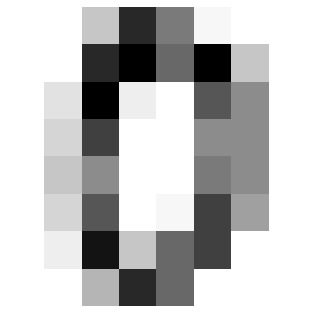

In [64]:
### Visulizing
import matplotlib.pyplot as plt
plt.style.use("seaborn")
plt.imshow(X[0].reshape((8,8)))
plt.axis("off")
plt.show()

In [65]:
### Traning the neural network
model = Sequential(name='digit_classifier')
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.build(input_shape=(1,64))
model.summary()

Model: "digit_classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (1, 128)                  8320      
_________________________________________________________________
dense_14 (Dense)             (1, 64)                   8256      
_________________________________________________________________
dense_15 (Dense)             (1, 32)                   2080      
_________________________________________________________________
dense_16 (Dense)             (1, 10)                   330       
Total params: 18,986
Trainable params: 18,986
Non-trainable params: 0
_________________________________________________________________


In [66]:
### MAking the one hot vector
Y = np_utils.to_categorical(Y)
print(Y.shape)

(1797, 10)


In [67]:
model.compile(optimizer='adam',loss='categorical_crossentropy')
hist = model.fit(X,Y,epochs=10,batch_size=32,validation_split=0.2)

Train on 1437 samples, validate on 360 samples
Epoch 1/10
1437/1437 [==============================] - 0s 227us/step - loss: 1.6694 - val_loss: 0.7699
Epoch 2/10
1437/1437 [==============================] - 0s 80us/step - loss: 0.3066 - val_loss: 0.4801
Epoch 3/10
1437/1437 [==============================] - 0s 84us/step - loss: 0.1340 - val_loss: 0.3987
Epoch 4/10
1437/1437 [==============================] - 0s 84us/step - loss: 0.0846 - val_loss: 0.3656
Epoch 5/10
1437/1437 [==============================] - 0s 83us/step - loss: 0.0514 - val_loss: 0.3346
Epoch 6/10
1437/1437 [==============================] - 0s 109us/step - loss: 0.0410 - val_loss: 0.2943
Epoch 7/10
1437/1437 [==============================] - 0s 99us/step - loss: 0.0334 - val_loss: 0.3412
Epoch 8/10
1437/1437 [==============================] - 0s 101us/step - loss: 0.0282 - val_loss: 0.3252
Epoch 9/10
1437/1437 [==============================] - 0s 106us/step - loss: 0.0182 - val_loss: 0.3039
Epoch 10/10
1437/1437 

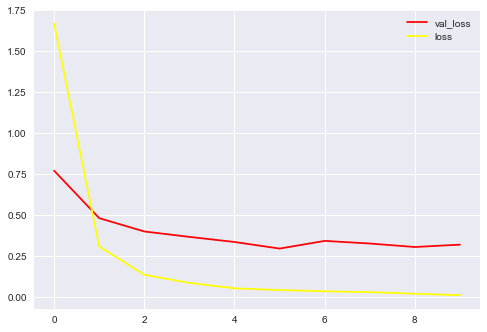

In [68]:
val_loss = hist.history['val_loss']
loss = hist.history['loss']

plt.style.use("seaborn")
plt.plot(val_loss,color='red',label='val_loss')
plt.plot(loss,color='yellow',label='loss')
plt.legend()
plt.show()

In [84]:
## Prediction of accuracy
y_Pred = model.predict_classes(X)

acc = 0
for i in range(len(y_Pred)):
    if y_Pred[i]==Y_act[i]:
        acc += 1
print("The accutracy of the model is {}".format(acc/len(y_Pred)))

The accutracy of the model is 0.9849749582637729
